In [91]:
# EDA & Data Manipulation part 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# read  and merge the data
path = '../../data/raw'
training_values = pd.read_csv(path + '/TrainingSetValues.csv')
training_labels = pd.read_csv(path + '/TrainingSetLabels.csv')
testing = pd.read_csv(path + '/TestSetValues.csv')

training = pd.merge(training_values, training_labels, how='inner', on='id')
print (list(training.columns.values)) # column names of df
training.head(5)

['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
training_values.head(5)
training_values.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [4]:
# create a subset of data
subset = training.iloc[:,0:17]
subset.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi


In [29]:
# check missing values
subset.isnull().sum()

id                  0
amount_tsh          0
date_recorded       0
funder           3635
gps_height          0
installer        3655
longitude           0
latitude            0
wpt_name            0
num_private         0
basin               0
subvillage        371
region              0
region_code         0
district_code       0
lga                 0
ward                0
dtype: int64

In [31]:
subset.shape

(59400, 17)

In [67]:
# IDs are unique
sum(subset.id.duplicated())

0

(array([5.9367e+04, 1.6000e+01, 4.0000e+00, 9.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0.,  35000.,  70000., 105000., 140000., 175000., 210000.,
        245000., 280000., 315000., 350000.]),
 <a list of 10 Patch objects>)

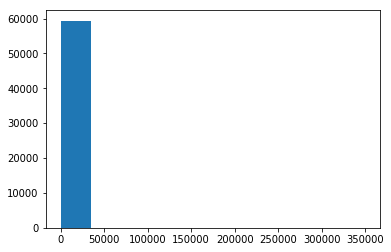

In [36]:
plt.hist(subset.amount_tsh)

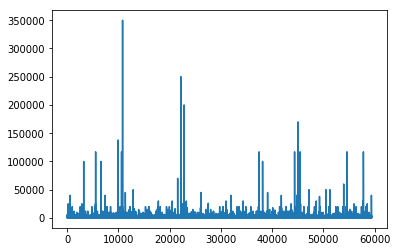

In [56]:
plt.plot(subset.amount_tsh)

{'boxes': [<matplotlib.lines.Line2D at 0x18e3df88cc0>],
 'caps': [<matplotlib.lines.Line2D at 0x18e3e021710>,
 'fliers': [<matplotlib.lines.Line2D at 0x18e3e0033c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18e3e021f60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18e3df88e10>,
  <matplotlib.lines.Line2D at 0x18e3e0212e8>]}

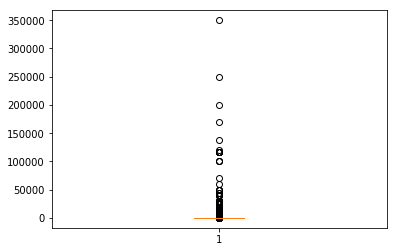

In [38]:
plt.boxplot(subset.amount_tsh)

In [10]:
subset.amount_tsh.describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [73]:
min(subset.date_recorded)

'2002-10-14'

In [74]:
max(subset.date_recorded)

'2013-12-03'

In [79]:
len(subset.funder.unique())
# maybe not important

1898

(array([25526.,  5937.,  2304.,  4079.,  7382.,  7933.,  4379.,  1558.,
          270.,    32.]),
 array([ -90.,  196.,  482.,  768., 1054., 1340., 1626., 1912., 2198.,
        2484., 2770.]),
 <a list of 10 Patch objects>)

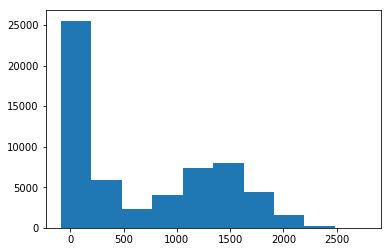

In [5]:
plt.hist(subset.gps_height)

In [6]:
subset.gps_height.describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

In [8]:
subset[subset.gps_height<0]
# might be wrong?

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward
34,41583,0.0,2011-02-23,NaN,-41,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,0,Rufiji,Kilombero B,Pwani,60,63,Mafia,Baleni
152,60983,0.0,2013-03-16,0,-15,0,39.527114,-6.988748,Msikitini,0,Wami / Ruvu,Madrasa,Dar es Salaam,7,3,Temeke,Kimbiji
181,68908,0.0,2011-03-05,NaN,-21,NaN,39.670943,-7.906606,Royal,0,Rufiji,Kigamboni,Pwani,60,60,Mafia,Kilindoni
184,2136,0.0,2011-02-22,NaN,-16,NaN,39.854320,-7.783063,Mvivini,0,Rufiji,Jimbo Mjini,Pwani,60,63,Mafia,Kirongwe
249,35193,0.0,2011-03-16,Amref,-19,AMREF,39.244178,-7.368293,Kwa,0,Rufiji,Kimogola,Pwani,6,4,Mkuranga,Magawa
309,54009,0.0,2011-02-21,NaN,-25,NaN,39.688329,-7.959371,Ukunda,0,Rufiji,Ukunda,Pwani,60,60,Mafia,Kiegeani
317,39704,0.0,2013-02-15,Fini Water,-32,Fini water,40.301987,-10.320959,Kwa Nassoro Ahmad,0,Ruvuma / Southern Coast,Chihano,Mtwara,99,1,Mtwara Rural,Ziwani
320,15840,0.0,2013-02-02,Fini Water,-40,Fini Water,40.116768,-10.283676,Bombani Kwa Chananda,0,Ruvuma / Southern Coast,Mkundi,Mtwara,9,5,Mtwara Urban,Magengeni
324,33963,0.0,2013-02-21,Government Of Tanzania,-19,DWE,39.462112,-8.850923,Chujioni,0,Ruvuma / Southern Coast,Mtanga,Lindi,80,13,Kilwa,Masoko
375,19304,50.0,2011-03-04,W.B,-45,Phase,39.183369,-8.141222,Mkali,0,Rufiji,Nyampakupwani,Pwani,60,53,Rufiji,Chumbi


In [13]:
len(subset.installer.unique())

2146

In [16]:
subset.longitude.describe()

count    59400.000000
mean        34.077427
std          6.567432
min          0.000000
25%         33.090347
50%         34.908743
75%         37.178387
max         40.345193
Name: longitude, dtype: float64

(array([ 1812.,     0.,     0.,     0.,     0.,     0.,     0.,  8865.,
        27243., 21480.]),
 array([ 0.        ,  4.03451931,  8.06903861, 12.10355792, 16.13807723,
        20.17259654, 24.20711584, 28.24163515, 32.27615446, 36.31067376,
        40.34519307]),
 <a list of 10 Patch objects>)

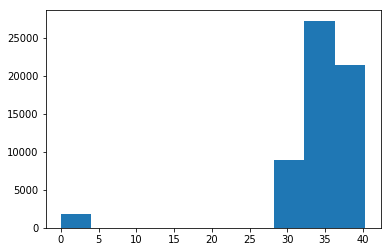

In [21]:
plt.hist(subset.longitude)

In [24]:
len(subset[subset.longitude == 0])

1812

In [25]:
subset.latitude.describe()

count    5.940000e+04
mean    -5.706033e+00
std      2.946019e+00
min     -1.164944e+01
25%     -8.540621e+00
50%     -5.021597e+00
75%     -3.326156e+00
max     -2.000000e-08
Name: latitude, dtype: float64

(array([ 3602.,  4856.,  7675.,  4649.,  5938.,  6079.,  8869., 11506.,
         4189.,  2037.]),
 array([-1.16494402e+01, -1.04844962e+01, -9.31955215e+00, -8.15460813e+00,
        -6.98966412e+00, -5.82472010e+00, -4.65977608e+00, -3.49483207e+00,
        -2.32988805e+00, -1.16494404e+00, -2.00000000e-08]),
 <a list of 10 Patch objects>)

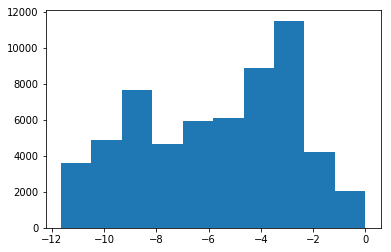

In [26]:
plt.hist(subset.latitude)

In [27]:
subset.num_private.describe()

count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64

In [28]:
subset[subset.num_private>0]
# no definition of num_private

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward
469,43604,0.0,2011-03-23,Unhcr,288,REDESO,38.517002,-5.591650,Kwa Mazenyeko,39,Pangani,Sokoni,Tanga,4,6,Handeni,Mgambo
476,27523,20.0,2011-02-24,Private,-32,Priva,38.979944,-7.954320,Kiambwe,5,Rufiji,Kingwande,Pwani,60,53,Rufiji,Ikwiriri
519,72238,0.0,2011-03-13,Tardo,1794,Tardo,38.245052,-4.661949,Kwa Mzee Hamisi,45,Pangani,Chavakaa,Tanga,4,1,Lushoto,Shume
527,26851,0.0,2011-03-20,Sabemo,1665,Chamavita,38.345578,-4.749421,Kwa Mzee Sau,6,Pangani,Kwemkangala,Tanga,4,1,Lushoto,Kwai
608,71658,0.0,2011-03-25,District Council,289,Handeni Trunk Main(,38.545166,-5.257279,Kwa Samakudu,3,Pangani,Tobora,Tanga,4,6,Handeni,Segera
727,8709,20.0,2013-02-14,Muwsa,895,MUWSA,37.340287,-3.320053,Mapendo Kiosk,698,Pangani,Sabasaba Street,Kilimanjaro,3,6,Moshi Urban,Rau
748,18488,1000.0,2011-03-21,Sabemo,1584,Chamavita,38.356068,-4.724289,Kwa France Athumani,6,Pangani,Gezaulole,Tanga,4,1,Lushoto,Kwai
818,54163,0.0,2011-03-24,District Council,323,Handeni Trunk Main(,38.534030,-5.522756,Kwa Ujuku,5,Pangani,Mkoroshini,Tanga,4,6,Handeni,Mgambo
820,37114,0.0,2011-03-15,Mkinga Distric Coun,0,DWE,38.811746,-4.824019,none,32,Pangani,Loko,Tanga,4,8,Mkinga,Maramba
837,9401,0.0,2011-03-14,Tardo,1754,Tardo,38.287399,-4.634075,Kwa Mzee Pazi,15,Pangani,Maringo,Tanga,4,1,Lushoto,Malindi


In [29]:
len(subset.basin.unique())

9

In [30]:
len(subset.subvillage.unique())

19288

In [31]:
len(subset.region.unique())

21

In [32]:
pd.crosstab(subset.basin,subset.region)

region,Arusha,Dar es Salaam,Dodoma,Iringa,Kagera,Kigoma,Kilimanjaro,Lindi,Manyara,Mara,...,Morogoro,Mtwara,Mwanza,Pwani,Rukwa,Ruvuma,Shinyanga,Singida,Tabora,Tanga
basin,,,,,,,,,,,,,,,,,,,,,
Internal,1309,0,827,0,0,0,169,0,1206,0,...,0,0,0,0,0,0,1641,1992,641,0
Lake Nyasa,0,0,0,1582,0,0,0,0,0,0,...,0,0,0,0,0,1073,0,0,0,0
Lake Rukwa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1011,0,0,1,15,0
Lake Tanganyika,0,0,0,0,341,2816,0,0,0,0,...,0,0,99,0,797,0,1072,8,1299,0
Lake Victoria,32,0,0,0,2975,0,0,0,0,1969,...,0,0,3003,0,0,0,2269,0,0,0
Pangani,2009,0,0,0,0,0,4210,0,288,0,...,0,0,0,0,0,0,0,0,0,2433
Rufiji,0,0,359,3712,0,0,0,90,0,0,...,1893,0,0,784,0,260,0,92,4,0
Ruvuma / Southern Coast,0,0,0,0,0,0,0,1456,0,0,...,0,1730,0,0,0,1307,0,0,0,0
Wami / Ruvu,0,805,1015,0,0,0,0,0,89,0,...,2113,0,0,1851,0,0,0,0,0,114


In [43]:
region_code = subset.region_code.unique()
for i in region_code:
    print(subset[subset.region_code == i].region.unique())
    
#region_code doesn't match with the region

['Iringa' 'Shinyanga']
['Mara']
['Manyara']
['Mtwara']
['Kagera' 'Lindi']
['Tanga']
['Shinyanga' 'Mwanza']
['Tabora' 'Shinyanga']
['Pwani']
['Ruvuma']
['Kilimanjaro']
['Rukwa']
['Mwanza']
['Kigoma']
['Lindi']
['Dodoma']
['Pwani']
['Arusha']
['Mbeya']
['Singida']
['Morogoro' 'Tanga']
['Dar es Salaam']
['Mtwara']
['Arusha']
['Mtwara']
['Lindi']
['Pwani']


In [52]:
len(subset.district_code.unique())

20

In [58]:
len(subset.lga.unique())

125

In [60]:
len(subset.ward.unique())

2092

In [86]:
ward = subset.ward.unique()
ward_dict = dict()
for i in ward:
    ward_dict[i] = subset[subset.ward == i].lga.unique()
ward_dict

{'Mundindi': array(['Ludewa'], dtype=object),
 'Natta': array(['Serengeti'], dtype=object),
 'Ngorika': array(['Simanjiro'], dtype=object),
 'Nanyumbu': array(['Nanyumbu'], dtype=object),
 'Nyakasimbi': array(['Karagwe'], dtype=object),
 'Moa': array(['Mkinga'], dtype=object),
 'Samuye': array(['Shinyanga Rural'], dtype=object),
 'Chambo': array(['Kahama'], dtype=object),
 'Itetemia': array(['Tabora Urban'], dtype=object),
 'Kaisho': array(['Karagwe'], dtype=object),
 'Tambani': array(['Mkuranga'], dtype=object),
 'Msindo': array(['Namtumbo', 'Same'], dtype=object),
 'Busilili': array(['Maswa'], dtype=object),
 'Siha Kaskazini': array(['Siha'], dtype=object),
 'Nkoma': array(['Meatu', 'Bariadi'], dtype=object),
 'Mkowe': array(['Sumbawanga Rural'], dtype=object),
 'Mdandu': array(['Njombe'], dtype=object),
 'Usuka': array(['Njombe'], dtype=object),
 'Ilangala': array(['Ukerewe'], dtype=object),
 'Mawengi': array(['Ludewa'], dtype=object),
 'Matola': array(['Njombe'], dtype=object),
 'I

In [90]:
for i in ward_dict.values():
    if len(i)>1:
        print(i)
# ward can belong to different lga

['Namtumbo' 'Same']
['Meatu' 'Bariadi']
['Same' 'Muheza']
['Njombe' 'Mufindi']
['Arusha Rural' 'Ukerewe']
['Moshi Urban' 'Same' 'Kiteto']
['Kishapu' 'Kondoa']
['Rungwe' 'Ulanga']
['Lushoto' 'Muheza']
['Ilala' 'Sikonge']
['Njombe' 'Mbarali']
['Namtumbo' 'Rufiji']
['Mafia' 'Mwanga']
['Kyela' 'Ulanga']
['Mbozi' 'Mbinga']
['Newala' 'Mtwara Rural']
['Chunya' 'Mvomero' 'Mafia']
['Kahama' 'Igunga']
['Same' 'Kibaha']
['Mpwapwa' 'Ruangwa']
['Chunya' 'Tabora Urban']
['Kilombero' 'Kilolo']
['Arusha Rural' 'Simanjiro']
['Kyela' 'Manyoni']
['Kibaha' 'Tabora Urban']
['Mufindi' 'Ileje' 'Sumbawanga Urban']
['Kilombero' 'Mpanda']
['Singida Rural' 'Bahi']
['Muheza' 'Nanyumbu']
['Mpwapwa' 'Ulanga']
['Ruangwa' 'Kilwa']
['Shinyanga Rural' 'Nzega' 'Kwimba']
['Bukoba Rural' 'Geita']
['Mwanga' 'Missungwi']
['Kahama' 'Igunga']
['Serengeti' 'Tarime']
['Manyoni' 'Tanga']
['Monduli' 'Moshi Rural' 'Korogwe']
['Chamwino' 'Urambo']
['Ilala' 'Handeni']
['Ngara' 'Kahama']
['Mpanda' 'Lushoto' 'Chunya']
['Uyui' 'Sengere

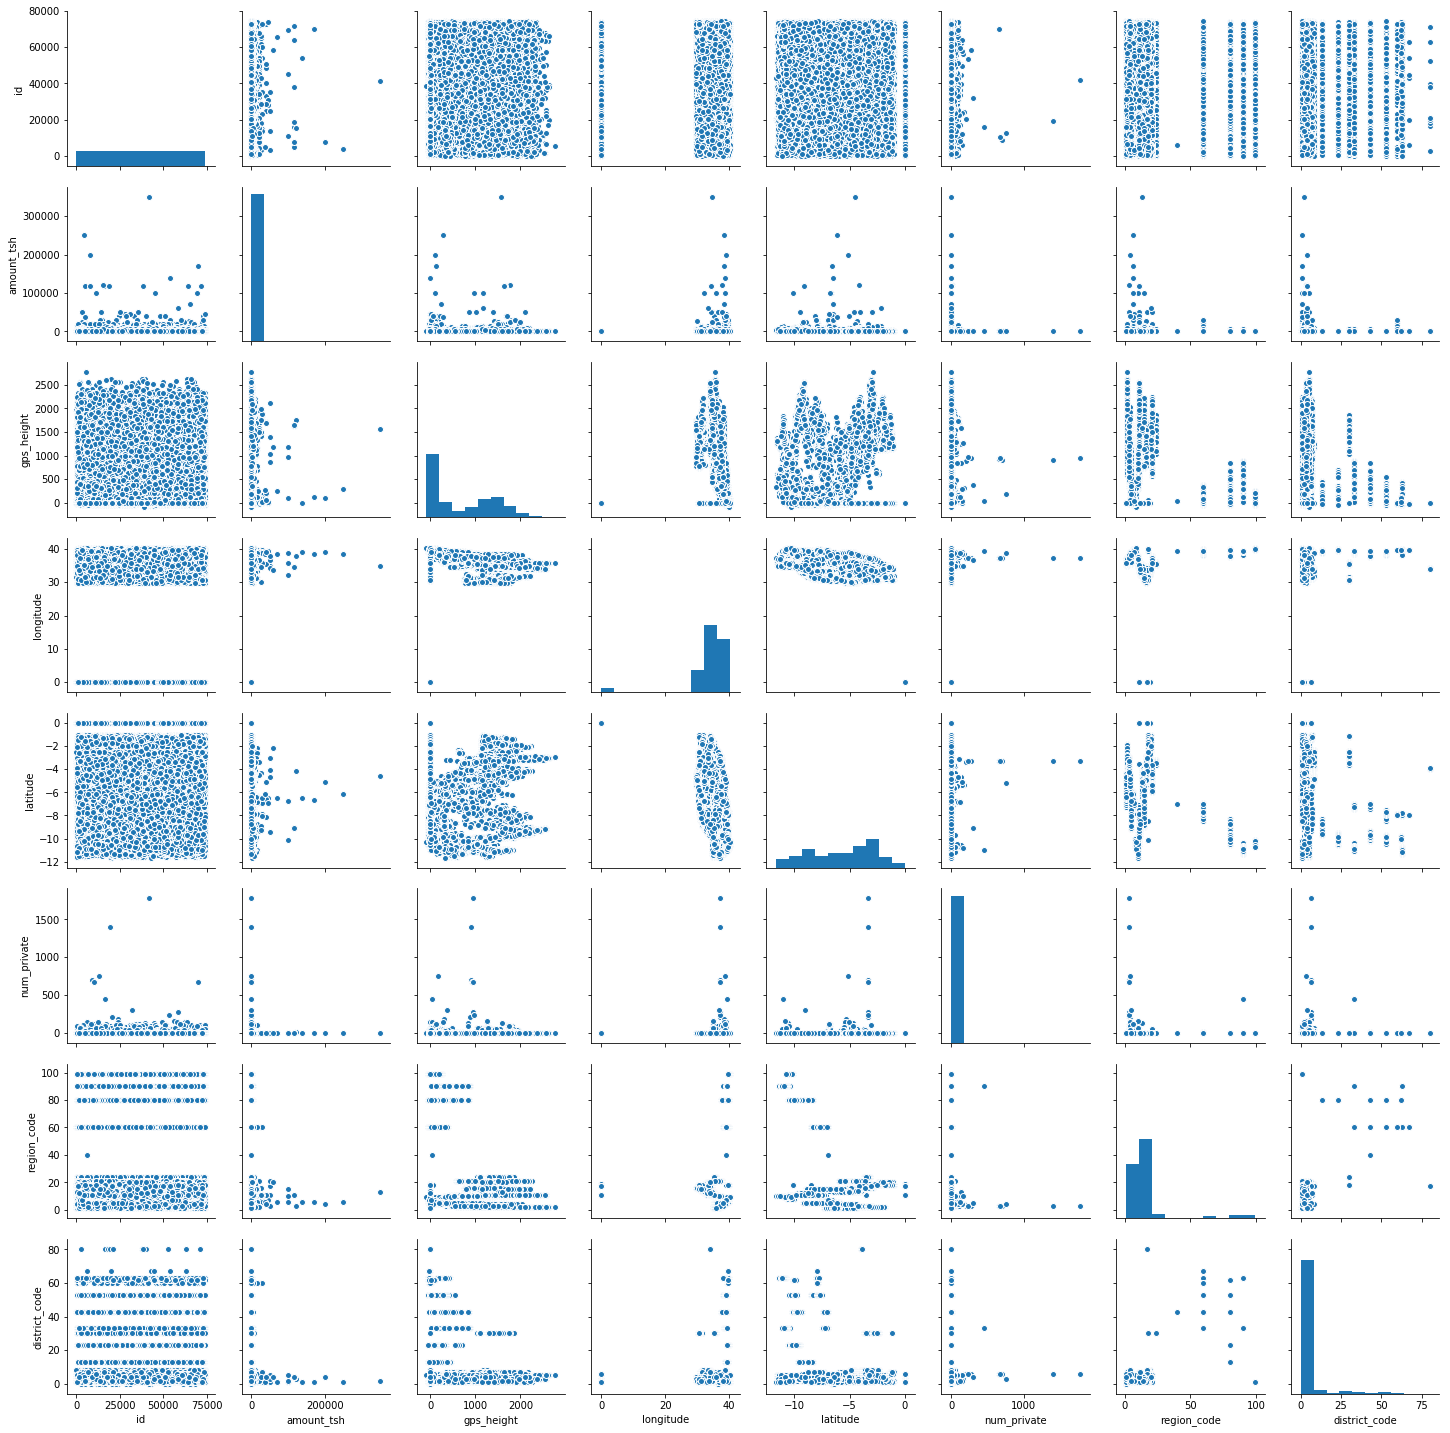

In [92]:
sns.pairplot(subset)

In [93]:
pd.crosstab(subset.region,subset.district_code)

district_code,0,1,2,3,4,5,6,7,8,13,23,30,33,43,53,60,62,63,67,80
region,,,,,,,,,,,,,,,,,,,,
Arusha,0,189,1206,109,0,201,310,1009,0,0,0,326,0,0,0,0,0,0,0,0
Dar es Salaam,0,93,497,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dodoma,23,888,0,361,347,358,224,0,0,0,0,0,0,0,0,0,0,0,0,0
Iringa,0,728,530,650,2473,564,0,349,0,0,0,0,0,0,0,0,0,0,0,0
Kagera,0,771,487,402,403,0,88,260,236,0,0,669,0,0,0,0,0,0,0,0
Kigoma,0,874,1159,727,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kilimanjaro,0,595,519,877,1225,620,109,434,0,0,0,0,0,0,0,0,0,0,0,0
Lindi,0,1,7,300,0,0,0,0,0,391,293,0,0,154,291,0,109,0,0,0
Manyara,0,550,274,297,276,186,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
print(subset.head())
print(subset.columns)

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  \
0  34.938093  -9.856322                  none            0   
1  34.698766  -2.147466              Zahanati            0   
2  37.460664  -3.821329           Kwa Mahundi            0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4  31.130847  -1.825359               Shuleni            0   

                     basin  subvillage   region  region_code  district_code  \
0               Lake Nyasa    Mnyusi B   Iringa           11              5   


In [99]:
cleaned_subset = subset[['id','amount_tsh','date_recorded','gps_height','longitude','latitude','basin','region','district_code']]

In [106]:
cleaned_subset.groupby('basin').size()

basin
Internal                    7785
Lake Nyasa                  5085
Lake Rukwa                  2454
Lake Tanganyika             6432
Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Ruvuma / Southern Coast     4493
Wami / Ruvu                 5987
dtype: int64

In [107]:
cleaned_subset.groupby('region').size()

region
Arusha           3350
Dar es Salaam     805
Dodoma           2201
Iringa           5294
Kagera           3316
Kigoma           2816
Kilimanjaro      4379
Lindi            1546
Manyara          1583
Mara             1969
Mbeya            4639
Morogoro         4006
Mtwara           1730
Mwanza           3102
Pwani            2635
Rukwa            1808
Ruvuma           2640
Shinyanga        4982
Singida          2093
Tabora           1959
Tanga            2547
dtype: int64

In [108]:
cleaned_subset.groupby('district_code').size()

district_code
0        23
1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
13      391
23      293
30      995
33      874
43      505
53      745
60       63
62      109
63      195
67        6
80       12
dtype: int64

In [110]:
training[training.amount_tsh == 0].groupby('status_group').size()

status_group
functional                 19706
functional needs repair     3048
non functional             18885
dtype: int64